## Preprocessing

In [21]:
library(tidyverse)

In [9]:
setwd("/home/asus/content/Notes/Semester 4/FDN Lab/Experiments/Experiment 3")

In [10]:
df <- data.frame(
  ID = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
  Name = c("Alice", "Bob", NA, "David", "Emma", "Frank", NA, "Hannah", "Ian", "Jack"),
  Age = c(25, NA, 30, 29, NA, 35, 40, NA, 50, 27),
  Salary = c(50000, 60000, 55000, NA, 70000, 75000, 80000, 65000, NA, 72000),
  Score = c(80, 90, NA, 85, 88, 92, NA, 77, 95, Inf)
)


## Exploring Inbuilt Functions

a. Check missing values in a dataset using is.na(), complete.cases(), and summary()

In [12]:
is.na(df)


ID,Name,Age,Salary,Score
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE,TRUE
FALSE,FALSE,FALSE,TRUE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE,TRUE
FALSE,FALSE,TRUE,FALSE,FALSE
FALSE,FALSE,FALSE,TRUE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE


In [13]:
complete.cases(df)

[1]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE

In [14]:
df[complete.cases(df), ]


,ID,Name,Age,Salary,Score
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1,Alice,25,50000,80
6,6,Frank,35,75000,92
10,10,Jack,27,72000,Inf


In [15]:
summary(df)

       ID            Name                Age            Salary     
 Min.   : 1.00   Length:10          Min.   :25.00   Min.   :50000  
 1st Qu.: 3.25   Class :character   1st Qu.:28.00   1st Qu.:58750  
 Median : 5.50   Mode  :character   Median :30.00   Median :67500  
 Mean   : 5.50                      Mean   :33.71   Mean   :65875  
 3rd Qu.: 7.75                      3rd Qu.:37.50   3rd Qu.:72750  
 Max.   :10.00                      Max.   :50.00   Max.   :80000  
                                    NA's   :3       NA's   :2      
     Score      
 Min.   :77.00  
 1st Qu.:83.75  
 Median :89.00  
 Mean   :  Inf  
 3rd Qu.:92.75  
 Max.   :  Inf  
 NA's   :2      

b. Identify outliers using boxplot(), quantile(), and IQR().

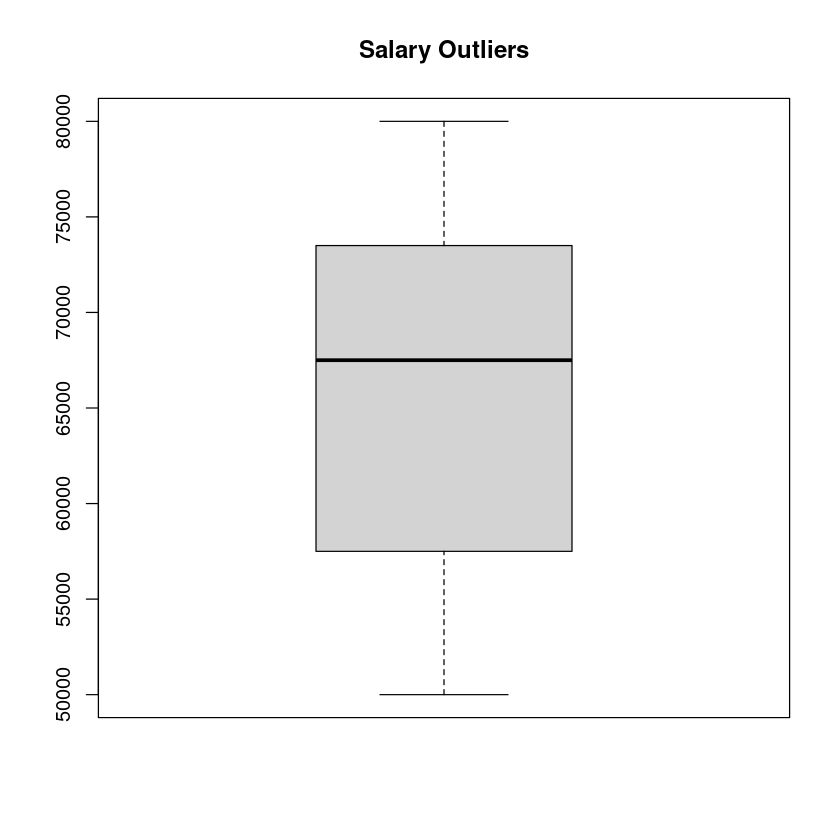

In [16]:
boxplot(df$Salary, main = "Salary Outliers", horizontal = FALSE)


In [17]:
# Identify outliers using IQR
Q1 <- quantile(df$Salary, 0.25, na.rm = TRUE)
Q3 <- quantile(df$Salary, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR
outliers <- df$Salary[df$Salary < lower_bound | df$Salary > upper_bound]
print(outliers)


[1] NA NA


In [18]:
iqr_value <- IQR(df$Salary, na.rm=TRUE)
print(iqr_value)

[1] 14000


Explore imputation methods like mean, median, and mode replacement using na.omit(),
impute(), and mice().

In [19]:
df_clean <- na.omit(df)
print(df_clean)

   ID  Name Age Salary Score
1   1 Alice  25  50000    80
6   6 Frank  35  75000    92
10 10  Jack  27  72000   Inf


Using Tidyverse Mutate

In [30]:
df <- df %>%
  mutate(
    Age = ifelse(is.na(Age), mean(Age, na.rm = TRUE), Age),
    Salary = ifelse(is.na(Salary), mean(Salary, na.rm = TRUE), Salary),
    Score = ifelse(is.na(Score), mean(Score, na.rm = TRUE), Score)
  )

Using Tidyverse Mice

In [27]:
# Apply mice for missing value imputation
imputed_data <- mice(df, method = "pmm", m = 5)  # Predictive Mean Matching

# Extract the completed dataset
df_complete <- complete(imputed_data)

ERROR: Error in library(mice): there is no package called ‘mice’
